In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from IPython.core.debugger import set_trace

from Tools import Trainer

## Loading datasets

In [2]:
from Tools.Dataloader import datasets_loader
train_loader, valid_loader, test_loader = datasets_loader()

## Hyper-parameters

In [3]:
hyperparams = {'num_epochs': 25,
               'lr0' :0.1, 
               'save_checkpoint': False
                  }
cuda_available = torch.cuda.is_available()

## Creating the model

In [4]:
from Classifier.XavierCNN import XavierClassifier

model = XavierClassifier()

if cuda_available:
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=hyperparams['lr0'])
criterion = nn.CrossEntropyLoss()

In [5]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
              ReLU-2           [-1, 16, 64, 64]               0
   GaussianDropout-3           [-1, 16, 64, 64]               0
            Conv2d-4           [-1, 32, 64, 64]           4,640
              ReLU-5           [-1, 32, 64, 64]               0
         MaxPool2d-6           [-1, 32, 32, 32]               0
   GaussianDropout-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          18,496
              ReLU-9           [-1, 64, 32, 32]               0
  GaussianDropout-10           [-1, 64, 32, 32]               0
           Conv2d-11          [-1, 128, 32, 32]          73,856
             ReLU-12          [-1, 128, 32, 32]               0
        MaxPool2d-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

## Training 

In [6]:
from Tools.Trainer import Trainer

trainer = Trainer(model, optimizer, criterion, train_loader, valid_loader, test_loader, hyperparams)
nll_train, nll_valid, acc_train, acc_valid =  trainer.train_model()
print('Done...')

------ Epoch # 1 ------
 Iteration 40: TRAIN 0.6921
 Iteration 80: TRAIN 0.6848
 Iteration 120: TRAIN 0.6819
------ Epoch # 2 ------
 Iteration 160: TRAIN 0.6754
 Iteration 200: TRAIN 0.6630
 [Loss] TRAIN 0.7130 / VALID 0.7351
 [ACC] TRAIN 0.5324 / VALID 0.5105
 Iteration 240: TRAIN 0.6571
 Iteration 280: TRAIN 0.6385
------ Epoch # 3 ------
 Iteration 320: TRAIN 0.6334
 Iteration 360: TRAIN 0.6247
 Iteration 400: TRAIN 0.6012
 [Loss] TRAIN 0.5719 / VALID 0.5679
 [ACC] TRAIN 0.7104 / VALID 0.6957
 Iteration 440: TRAIN 0.5816
------ Epoch # 4 ------
 Iteration 480: TRAIN 0.5916
 Iteration 520: TRAIN 0.5657
 Iteration 560: TRAIN 0.5495
------ Epoch # 5 ------
 Iteration 600: TRAIN 0.5572
 [Loss] TRAIN 0.5128 / VALID 0.5099
 [ACC] TRAIN 0.7488 / VALID 0.7417
 Iteration 640: TRAIN 0.5412
 Iteration 680: TRAIN 0.5343
 Iteration 720: TRAIN 0.5382
------ Epoch # 6 ------
 Iteration 760: TRAIN 0.4992
 Iteration 800: TRAIN 0.5065
 [Loss] TRAIN 0.4831 / VALID 0.4885
 [ACC] TRAIN 0.7665 / VALID 0

## Visualization

### accuracy and loss plots

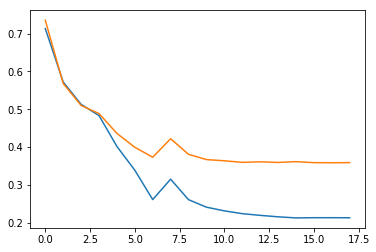

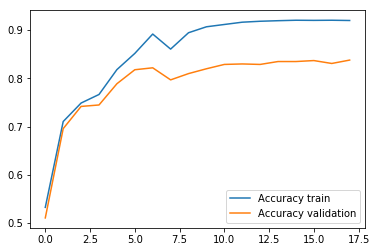

In [7]:
import Tools.Visualization as V
V.plots(nll_train, nll_valid, acc_train, acc_valid)

### Confusion Matrix

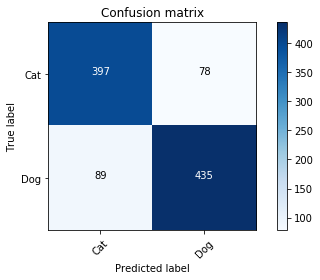

In [8]:
cnf_matrix = trainer.confusion_matrix()
V.plot_confusion_matrix(cnf_matrix)

## Generate Submission

In [10]:
import Tools.Trainer as T
results = T.predict_test_set(model, test_loader)
T.generate_submission(results)

Done...


## Saving the model

In [12]:
torch.save(model, "./Experiments/Xavier-25-0.01")